In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Definition of functions to be optimized 
def sphere(particles_x): 
    sum = 0
    for i in range(n):
        sum += particles_x[i]**2
    return sum  

def booth(particles_x):
    result =(particles_x[0] + 2*particles_x[1]-7)**2 +(2*particles_x[0]+particles_x[1]-5)**2
    return result

In [59]:
# Constant Initialisation
population = 20     # Size of the swarm
n = 2               # Function dimentions 
maxiter = 2000      # Looping constrain
tol = 1e-06         # Error margin
mass_max = 0.9      # Max inertia
mass_min = 0.4      # Min inertia
mass = mass_max     # Mass initialisation
c1 = c2 = 2         # Learning rates

glob_prog = []      # Array to save values of best x and f(x) per iteration 
X_l = np.empty(n)
X_u = np.empty(n)
i = 0               # Iteration number

symmetric = True    # Choose if boundaries will be symmetrical to siplify wall decleration
boundary = 50       # Boundry value if summetric
if symmetric == True:               
    for dim in range(n):          # Set lower and upper symmetric boundries
        X_l[dim] = -boundary
        X_u[dim] = boundary
else:
    X_l = []                # Lower boundry for X vector put by hand
    X_u = []                 # Upper boundry for X vector put by hand


In [60]:
# Chosen function to be itereted this run
f = sphere  

if f == booth: # Condition for Booth function in case n was not set right at initialization
    n = 2 

In [61]:
# Set convergence vectors to stop the loop because x* is known
# If x* is not known, the acording line in wile loop can be commented out
convergence = 0

In [62]:
# Initialize the particle population
swarm = pd.DataFrame(columns=["x", "v","f_x", "loc_xmin", "loc_fmin"])       # Create main matrix 
swarm.v = np.array(np.zeros((population, n))).tolist()          # Fill velocity vector with zeroes
# Fill x vector randomly (uniform)
if symmetric == True:
    swarm.x = np.array(np.random.uniform(-boundary, boundary, size=(population, n))).tolist()
else:
    dim = 0
    c = np.empty([n, population])
    for dim in range (n):
        c[dim] = np.array(np.random.uniform(X_l[dim], X_u[dim], size=(population)))
    swarm.x = c.T.tolist()
# Evaluate the particles’ f(x) and set the initial positions as local bests
for i in range(population):
    swarm.f_x[i] = f(swarm.loc[i]["x"])
    swarm.loc_xmin[i] = np.copy(swarm.x[i])
    swarm.loc_fmin[i] = f(swarm.loc[i]["x"])

In [63]:
# Find min of all f(x) and set it as global best and its position as global x best 
j = int(swarm.index[swarm["f_x"] == np.min(swarm["f_x"])].tolist()[0])
glob_xmin = np.copy(swarm.x[j])
glob_fmin = swarm.f_x[j]

In [64]:
print(j)
print(glob_prog)

3
[]


In [65]:
i = 0

In [300]:
while (i < maxiter) :
    # Store global best value for diagram.
    glob_prog.append([glob_xmin, glob_fmin] )
    # Check for convergence criterion
    if np.allclose(glob_fmin, convergence, atol= tol): break

    # Update Inertia
    mass = mass_max - ((mass_max-mass_min)/maxiter)*i
    for index, p in swarm.iterrows():
        # Generate r1,r2 as random numbers in (0,1).
        r1 = np.random.uniform()
        r2 = np.random.uniform()
        # Update its velocity according to the formula, with respect to local and global bests.
        p.v = np.multiply(mass,p.v)+np.multiply(c1*r1,p.loc_xmin-p.x)+np.multiply(c2*r2,glob_xmin-p.x)
        # Update its position according to the formula.
        p.x = np.add(p.x,p.v)
        for k in range(0, n):
            # Apply boundaries (absorbing walls)
            if p.x[k] < X_l[k]: p.x[k] = X_l[k]   
            if p.x[k] > X_u[k]: p.x[k] = X_u[k]

        # Check for local best update (by evaluation comparison) and if applicable:
        p.f_x = f(p.x)
        if p.f_x < p.loc_fmin: 
            p.loc_xmin = np.copy(p.x)
            p.loc_fmin = np.copy(p.f_x)
            ## Check for global best update.
            if p.f_x < glob_fmin: 
                glob_xmin = np.copy(p.x)
                glob_fmin = p.f_x
    i+=1

In [67]:
if i != maxiter:
    print("Convergance reached")
    print("stoped after "+ str(i) + " iterretions")

Convergance reached
stoped after 325 iterretions


In [68]:
x = []
fx = []
for best in glob_prog:
    x.append(best[0])           #Position values
    fx.append(best[1])          #Function values
    


<function matplotlib.pyplot.show(close=None, block=None)>

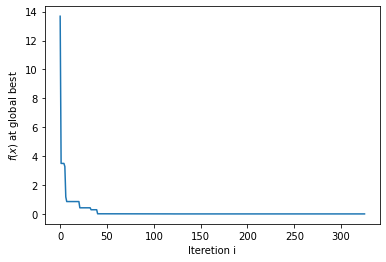

In [69]:
#Plot the values of f progresion
# plt.xlim([0, 30])       # x axis limits to "zoom"
plt.xlabel("Iteretion i")     
plt.ylabel("$f(x)$ at global best")     
plt.plot(fx)
plt.show

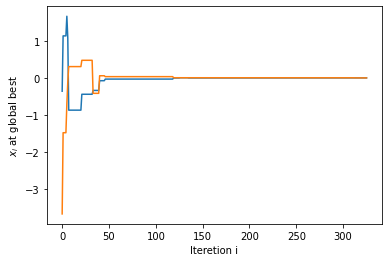

In [70]:
#Plot the values of eatch position dimention progresion
fig, ax = plt.subplots()
# plt.xlim([0, 30])     # x axis limits to "zoom"
plt.xlabel("Iteretion i")     
plt.ylabel("$x_i$ at global best")  
for i in range(n):
    ax.plot(np.array(x)[:,i].tolist())

<function matplotlib.pyplot.show(close=None, block=None)>

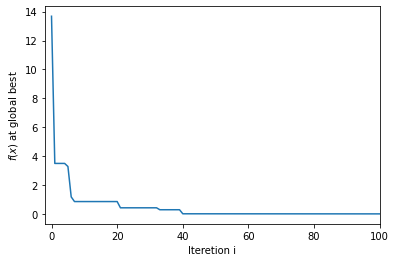

In [71]:
#Plot the values of f progresion
plt.xlim([-2, 100])       # x axis limits to "zoom"
plt.xlabel("Iteretion i")     
plt.ylabel("$f(x)$ at global best")     
plt.plot(fx)
plt.show

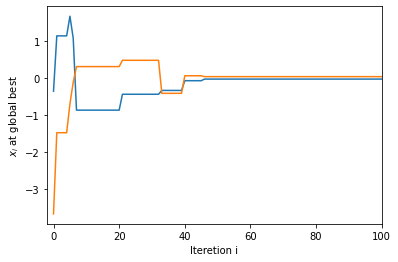

In [72]:
#Plot the values of eatch position dimention progresion
fig, ax = plt.subplots()
plt.xlim([-2, 100])     # x axis limits to "zoom"
plt.xlabel("Iteretion i")     
plt.ylabel("$x_i$ at global best")  
for i in range(n):
    ax.plot(np.array(x)[:,i].tolist())